In [5]:
%matplotlib inline
import os
import utils
import re
import nltk
import json
import gensim
import dateutil
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import advertools as adv
from scipy import sparse
from functools import reduce
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython.display import Image
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from textblob import TextBlob
from functools import reduce
from nltk.corpus import stopwords
from typing import List, Callable, Dict
from nltk.corpus import stopwords
from googletrans import Translator
from nltk.corpus import stopwords
from sklearn.metrics import r2_score
sns.set(style="ticks", color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, 'C://Users//jyoti//Desktop//NLP//NLP_project//NLP-project-//Models')
import utils

random_state=2022

In [6]:
path='C:\\Users\\jyoti\\Desktop\\NLP\\NLP_project\\NLP-project-\\Dataset\\'

In [7]:
df=pd.read_csv(path + '2.csv')

In [8]:
df

,Unnamed: 0,caption,following,likes,posts_count,followers,Hod,mon,tue,wed,thu,fri,sat,sun
0,2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,18,0,0,0,0,0,1,0
1,3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,21,1,0,0,0,0,0,0
2,4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,19,0,0,1,0,0,0,0
3,5,North Sea Halibut with sea vegetables and Roya...,308.0,163.0,343.0,4202.0,13,1,0,0,0,0,0,0
4,6,Adding the final touches before welcoming our ...,308.0,251.0,343.0,4202.0,17,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,41736,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,18,0,0,0,0,1,0,0
26796,41737,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,15,0,0,1,0,0,0,0
26797,41738,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,13,1,0,0,0,0,0,0
26798,41739,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,14,0,0,1,0,0,0,0


In [9]:
df.drop(['Unnamed: 0'], axis = 1,inplace=True)

In [10]:
data=df.astype(str)

In [12]:
type(data['caption'])

pandas.core.series.Series

In [13]:
def sentiment_analysis(caption):
    def getSubjectivity(text):
        return TextBlob(text).sentiment.subjectivity
  
    #Create a function to get the polarity
    def getPolarity(caption):
        return TextBlob(caption).sentiment.polarity
  
    #Create two new columns 'Subjectivity' & 'Polarity'
    data['TextBlob_Subjectivity'] =    data['caption'].apply(getSubjectivity)
    data ['TextBlob_Polarity'] = data['caption'].apply(getPolarity)
    return data

In [14]:
sentiment_analysis(data['caption'])

,caption,following,likes,posts_count,followers,Hod,mon,tue,wed,thu,fri,sat,sun,TextBlob_Subjectivity,TextBlob_Polarity
0,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,18,0,0,0,0,0,1,0,0.000000,0.000000
1,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,21,1,0,0,0,0,0,0,0.333333,0.250000
2,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,19,0,0,1,0,0,0,0,0.333333,0.166667
3,North Sea Halibut with sea vegetables and Roya...,308.0,163.0,343.0,4202.0,13,1,0,0,0,0,0,0,0.000000,0.000000
4,Adding the final touches before welcoming our ...,308.0,251.0,343.0,4202.0,17,0,0,0,0,1,0,0,0.791667,-0.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,18,0,0,0,0,1,0,0,0.506629,0.428030
26796,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,15,0,0,1,0,0,0,0,0.416667,0.491667
26797,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,13,1,0,0,0,0,0,0,0.510417,0.260417
26798,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,14,0,0,1,0,0,0,0,0.708333,0.445833


In [15]:
hashtag_summary = adv.extract_hashtags(data['caption'])
hashtag_summary.keys()
hashtag_summary['top_hashtags'][:5]

[('#london', 1553),
 ('#edinburgh', 1286),
 ('#foodie', 659),
 ('#bakery', 637),
 ('#richmond', 611)]

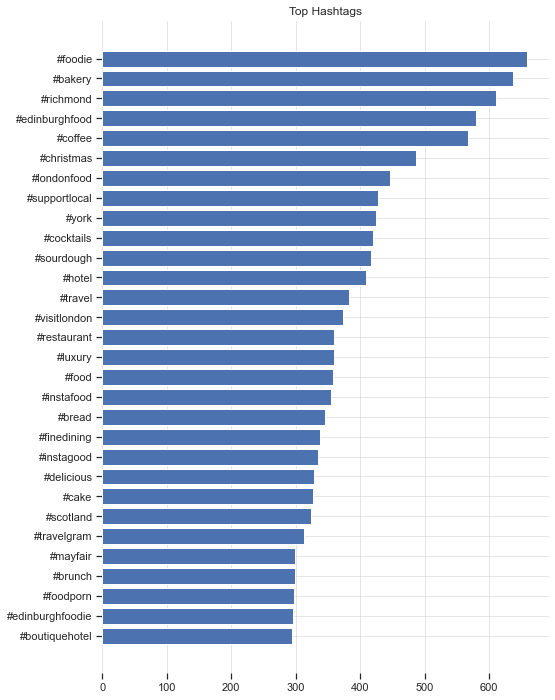

In [16]:
plt.figure(facecolor='white', figsize=(8, 12))
plt.barh([x[0] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1],
         [x[1] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1])
plt.title('Top Hashtags')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [17]:
emoji_summary = adv.extract_emoji(data['caption'])
emoji_summary.keys()
emoji_summary['top_emoji'][:5]

[('✨', 2130), ('📸', 1948), ('😍', 1165), ('❤️', 1163), ('🎄', 1011)]

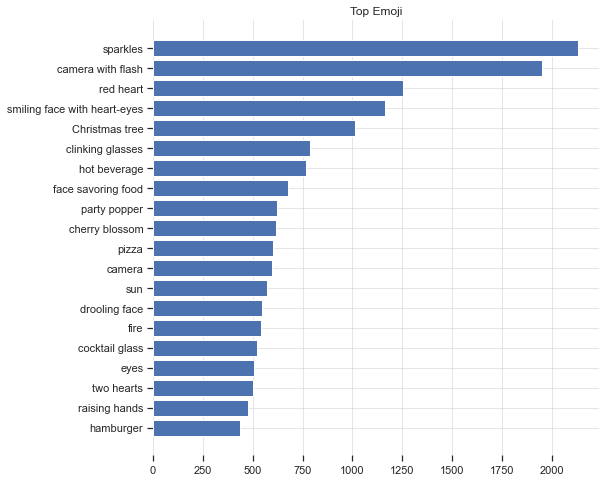

In [18]:
plt.figure(facecolor='white', figsize=(8, 8))
plt.barh([x[0] for x in emoji_summary['top_emoji_text'][:20]][::-1],
         [x[1] for x in emoji_summary['top_emoji_text'][:20]][::-1])
plt.title('Top Emoji')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [19]:
mention_summary = adv.extract_mentions(data['caption'])
mention_summary.keys()
mentions=mention_summary['top_mentions']

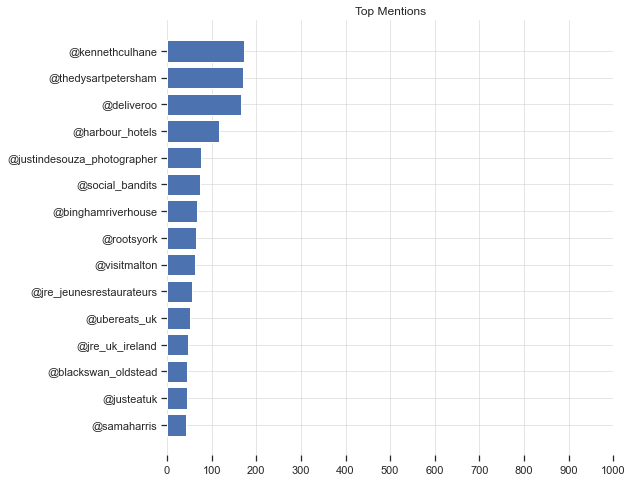

In [20]:
plt.figure(facecolor='white', figsize=(8, 8))
plt.barh([x[0] for x in mention_summary['top_mentions'][:15]][::-1],
         [x[1] for x in mention_summary['top_mentions'][:15]][::-1])
plt.title('Top Mentions')
plt.grid(alpha=0.5)
plt.xticks(range(0, 1100, 100))
plt.gca().set_frame_on(False)

In [21]:
extracted =  (data.assign(hashtags=hashtag_summary['hashtags'],
         hashcounts=hashtag_summary['hashtag_counts'],
         mentions=mention_summary['mentions'],
         mention_count=mention_summary['mention_counts'],
         emoji=emoji_summary['emoji'],
          emoji_text=emoji_summary['emoji_text'],
         emoji_count=emoji_summary['emoji_counts']         
         ))

extracted.head(5)

,caption,following,likes,posts_count,followers,Hod,mon,tue,wed,thu,...,sun,TextBlob_Subjectivity,TextBlob_Polarity,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count
0,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,18,0,0,0,0,...,0,0.000000,0.000000,"[#edinburghfoodies, #edinburghrestaurants, #nu...",25,[],0,[],[],0
1,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,21,1,0,0,0,...,0,0.333333,0.250000,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,[],0,[],[],0
2,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,19,0,0,1,0,...,0,0.333333,0.166667,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,"[@castlegamescotland, @wellocksfood]",2,[],[],0
3,North Sea Halibut with sea vegetables and Roya...,308.0,163.0,343.0,4202.0,13,1,0,0,0,...,0,0.000000,0.000000,"[#michelin, #michelinstar, #michelinuk, #edinb...",30,[],0,[],[],0
4,Adding the final touches before welcoming our ...,308.0,251.0,343.0,4202.0,17,0,0,0,0,...,0,0.791667,-0.041667,[],0,"[@_mark_donald, @theglenturretlalique, @cailbr...",11,[],[],0


In [37]:
#Converting the columns into the float datatype
a=['followers']
for i in a:
  extracted[i]= extracted[i].astype(str).astype(float)
extracted

,caption,following,likes,posts_count,followers,Hod,mon,tue,wed,thu,...,sun,TextBlob_Subjectivity,TextBlob_Polarity,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count
0,hand dived isle jura scallop smoked roe leek c...,308.0,100.0,343.0,4202.0,18,0,0,0,0,...,0,0.000000,0.000000,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,,0,[],,0
1,jerusalem artichoke prepared first dessert mal...,308.0,81.0,343.0,4202.0,21,1,0,0,0,...,0,0.333333,0.250000,"'#michelin', '#michelinstar', '#michelinuk', '...",28,,0,[],,0
2,main course seasonal 7 course menu borders roe...,308.0,146.0,343.0,4202.0,19,0,0,1,0,...,0,0.333333,0.166667,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],,0
3,north sea halibut sea vegetables royal beluski...,308.0,163.0,343.0,4202.0,13,1,0,0,0,...,0,0.000000,0.000000,"'#michelin', '#michelinstar', '#michelinuk', '...",30,,0,[],,0
4,adding final touches welcoming guests tonight ...,308.0,251.0,343.0,4202.0,17,0,0,0,0,...,0,0.791667,-0.041667,,0,"'@_mark_donald', '@theglenturretlalique', '@ca...",11,[],,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,alongside hospitality performing arts also mas...,599.0,4079.0,1933.0,167394.0,18,0,0,0,0,...,0,0.506629,0.428030,"'#lookingforward', '#theatreland', '#performin...",6,"'@evening', '@tiktok', '@nationalyouththeatre'...",4,[],,0
26796,isnt looking forward waking beautiful nights s...,599.0,1621.0,1933.0,167394.0,15,0,0,1,0,...,0,0.416667,0.491667,"'#lookingforward', '#travelinspiration', '#lov...",7,'@youmustgoblog',1,[🍾],'bottle with popping cork',1
26797,missing london town heres shot really showcase...,599.0,1548.0,1933.0,167394.0,13,1,0,0,0,...,0,0.510417,0.260417,"'#lookingforward', '#londonviews', '#prettycit...",8,'@damienhewetson',1,[],,0
26798,closed going try keep happy inspired mix beaut...,599.0,2637.0,1933.0,167394.0,14,0,0,1,0,...,0,0.708333,0.445833,"'#lookingforward', '#travelinspo', '#datenight...",7,,0,[],,0


In [47]:
word_freq_hash = adv.word_frequency(extracted['hashtags'].str.join(' '), extracted['followers'].fillna(0))
word_freq_hash.head()
# type(word_freq_hash.word)

d=pd.Series(word_freq_hash.rel_value.values,index=word_freq_hash.word.values ).to_dict()
print(d.get('#chelseabridgeclinic'))
print(d.get('#london'))
print(d.get('#test'))


def countHashtags(tags):
      if len(tags)==0:
        return 0
      sum = 0
      for i in tags:
        sum += (d.get(i))
      return sum/len(tags)

hashtag_average = extracted['hashtags'].apply(countHashtags)
extracted['hashtag_popularity'] = hashtag_average

None
None
None


TypeError: unsupported operand type(s) for +=: 'float' and 'NoneType'

In [44]:
import time
# Config

REPLACE_mentions = re.compile('@[A-Za-z0-9_]+')
REPLACE_hashtags=re.compile('#[A-Za-z0-9_]+')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
GOOD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

try:
    STOPWORDS = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    STOPWORDS = set(stopwords.words('english'))

def lower(text: str) -> str:
    """
    Transforms given text to lower case.
    Example:
    Input: 'I really like New York city'
    Output: 'i really like new your city'
    """

    return text.lower()

def replace_special_characters(text: str) -> str:
    """
    Replaces special characters, such as paranthesis,
    with spacing character
    """

    return REPLACE_BY_SPACE_RE.sub(' ', text)

def replace_br(text: str) -> str:
    """
    Replaces br characters
    """

    return text.replace('br', '')

def filter_out_uncommon_symbols(text: str) -> str:
    """
    Removes any special character that is not in the
    good symbols list (check regular expression)
    """

    return GOOD_SYMBOLS_RE.sub('', text)

def remove_stopwords(text: str) -> str:
    return ' '.join([x for x in text.split() if x and x not in STOPWORDS])


def strip_text(text: str) -> str:
    """
    Removes any left or right spacing (including carriage return) from text.
    Example:
    Input: '  This assignment is cool\n'
    Output: 'This assignment is cool'
    """

    return text.strip()

def remove_brackets_from_list(text:str)->str:
    """
    Remove the [] brackets from the each of the list
    """
    return text

global var
global stime

var = 0
def translation(text: str) -> str:
  
    """
    Replaces any non english words to the english language
    """
    translator = Translator()
    res=translator.translate(text, dest='en')
    return res.text


def clean_mention(text:str)-> str:
    return REPLACE_mentions.sub(' ', text)

def clean_hashtags(text:str)-> str:
    return REPLACE_hashtags.sub(' ', text)


In [45]:
PREPROCESSING_PIPELINE = [
                          clean_mention,
                          clean_hashtags,
                          # translation
                          lower,
                          replace_special_characters,
                          replace_br,
                          filter_out_uncommon_symbols,
                          remove_stopwords,
                          strip_text
                          ]

PREPROCESSING_PIPELINE1 = [remove_brackets_from_list]

# Anchor method

def text_prepare1(text: str,filter_methods = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """
    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE1
    return reduce(lambda txt, f: f(txt), filter_methods, text)

def text_prepare(text: str, filter_methods: List[Callable[[str], str]] = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """
    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE
    return reduce(lambda txt, f: f(txt), filter_methods, text)

# Pre-processing

print('Pre-processing text...')
print('[Debug] Before:\n{}'.format(extracted.caption[:10]))

L=['hashtags','emoji_text','mentions']
A=['caption']

# Replace each sentence with its pre-processed version
extracted['caption'] = extracted['caption'].apply(lambda txt: text_prepare(txt))

for i in L:
  extracted[i]=extracted[i].apply(lambda txt: text_prepare1(str(txt)[1:-1]))

print('[Debug] After:\n{}'.format(extracted.caption[:10]))
print()

print("Pre-processing completed!")


Pre-processing text...
[Debug] Before:
0    hand dived isle jura scallop smoked roe leek c...
1    jerusalem artichoke prepared first dessert mal...
2    main course seasonal 7 course menu borders roe...
3    north sea halibut sea vegetables royal beluski...
4    adding final touches welcoming guests tonight ...
5    congratulations chef de rangs dani andrea scot...
6    gift valentine future visit number one click l...
7              looking forward great weekend edinburgh
8    like bordeaux love le puy sizes 50cl magnum lu...
9    jeananthelme illatsavarin physiology taste 182...
Name: caption, dtype: object
[Debug] After:
0    hand dived isle jura scallop smoked roe leek c...
1    jerusalem artichoke prepared first dessert mal...
2    main course seasonal 7 course menu borders roe...
3    north sea halibut sea vegetables royal beluski...
4    adding final touches welcoming guests tonight ...
5    congratulations chef de rangs dani andrea scot...
6    gift valentine future visit numb

In [24]:
extracted.to_csv(path + '3.csv')

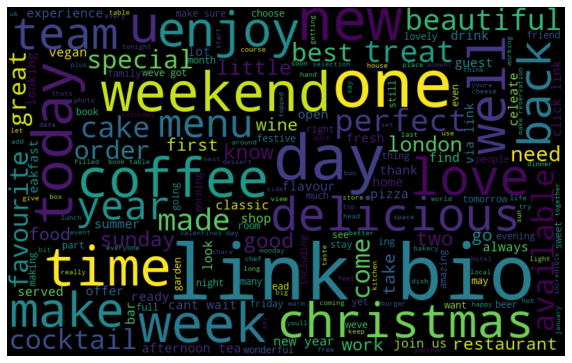

In [25]:
#Understanding the common words used in the captions: WordCloud

all_words = ' '.join([text for text in extracted['caption']]) 
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

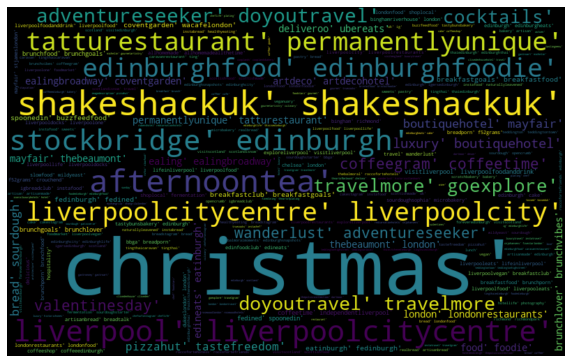

In [26]:
# Understanding the common words used in the Positive captions: WordCloud

normal_words =' '.join([text for text in extracted['hashtags']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

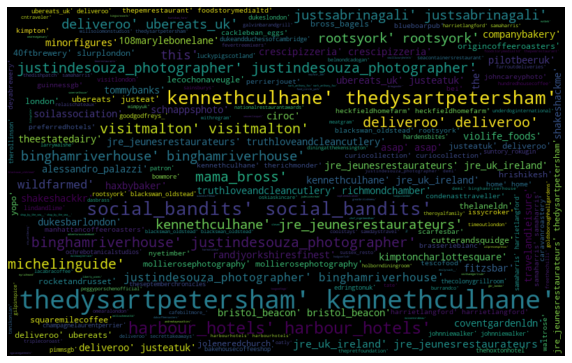

In [27]:
# Understanding the common words used in the Positive captions: WordCloud

normal_words =' '.join([text for text in extracted['mentions']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [28]:
def Feature_Extraction(dataframe,n,featureExtraction):
    vectorizer = featureExtraction(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None,max_features=240)
    bow_words = vectorizer.fit_transform(dataframe)
    bow_clean = bow_words.toarray()
    vocab = vectorizer.get_feature_names()
    # print(vocab)
    new_vocab = []
    for word in vocab:
        if len(word)>n:
            new_vocab.append(word)
    print (' '.join(new_vocab))
    words_clean = pd.DataFrame(data=bow_clean, columns=vocab)
    # words_clean.head()
    j1 = words_clean.columns.get_level_values(0).isin(new_vocab)
    words_clean = words_clean.loc[:,j1]
    # words_clean.head()
    return words_clean

In [29]:
bow_caption=Feature_Extraction(extracted['caption'],4,CountVectorizer)
bow_caption
print("\n\n\n")
bow_hashtags=Feature_Extraction(extracted['hashtags'],0,CountVectorizer)
bow_hashtags
print("\n\n\n")
# bow_emoji_text=Feature_Extraction(extracted['emoji_text'],0,CountVectorizer)
# bow_emoji_text
print("\n\n\n")
# bow_mentions=Feature_Extraction(extracted['mentions'],0,CountVectorizer)
# bow_mentions
print("\n\n\n")
bow_dataset = pd.DataFrame(np.hstack((bow_caption,extracted)))
bow_dataset

C:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


afternoon always amazing another around available baked bakery beautiful better black cakes celeate chance check cheese chicken chocolate choose christmas classic click cocktail cocktails coffee collection coming could course cream december delicious delivery dining dinner dishes drink drinks eakfast email enjoy evening every everyone excited experience family favourite festive first flavours follow forward fresh friday friends garden glass going great guests happy hotel house image including january kitchen lemon little local london looking lovely lunch making monday month morning night offer online opening order pastry people perfect pizza place please ready really restaurant right saturday sauce season selection served share someone something sourdough special start still store street summer sunday support sweet table takeaway thank thanks theres things think thursday today tomorrow topped treat treats using valentines vegan visit website weekend weeks welcome white winner winter wo

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,,0,[],,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0.333333,0.25,"'#michelin', '#michelinstar', '#michelinuk', '...",28,,0,[],,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0.333333,0.166667,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,"'#michelin', '#michelinstar', '#michelinuk', '...",30,,0,[],,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0.791667,-0.0416667,,0,"'@_mark_donald', '@theglenturretlalique', '@ca...",11,[],,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,0,0,0,0,0,0,0,0,0,0,...,0,0.506629,0.42803,"'#lookingforward', '#theatreland', '#performin...",6,"'@evening', '@tiktok', '@nationalyouththeatre'...",4,[],,0
26796,0,0,0,0,0,0,0,0,1,0,...,0,0.416667,0.491667,"'#lookingforward', '#travelinspiration', '#lov...",7,'@youmustgoblog',1,[🍾],'bottle with popping cork',1
26797,0,0,0,0,0,0,0,0,0,0,...,0,0.510417,0.260417,"'#lookingforward', '#londonviews', '#prettycit...",8,'@damienhewetson',1,[],,0
26798,0,0,0,0,0,0,0,0,1,0,...,0,0.708333,0.445833,"'#lookingforward', '#travelinspo', '#datenight...",7,,0,[],,0


In [30]:
bow_dataset.dtypes

0      object
1      object
2      object
3      object
4      object
        ...  
160    object
161    object
162    object
163    object
164    object
Length: 165, dtype: object

In [31]:
bow_dataset[133]

0        0
1        0
2        0
3        0
4        0
        ..
26795    0
26796    0
26797    0
26798    0
26799    0
Name: 133, Length: 26800, dtype: object

In [32]:
bow_dataset[139]

0        0
1        0
2        0
3        0
4        0
        ..
26795    0
26796    0
26797    0
26798    0
26799    1
Name: 139, Length: 26800, dtype: object

In [33]:
dropped = [133,156,158,160,161]
bow_dataset = bow_dataset.drop(dropped,axis=1)
bow_dataset

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,157,159,162,163,164
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,25,[],,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.25,28,[],,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.166667,28,[],,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,30,[],,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,-0.0416667,0,[],,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.42803,6,[],,0
26796,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0.491667,7,[🍾],'bottle with popping cork',1
26797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.260417,8,[],,0
26798,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0.445833,7,[],,0


In [34]:
bow_dataset[140]

0        0
1        0
2        0
3        0
4        0
        ..
26795    0
26796    0
26797    0
26798    0
26799    0
Name: 140, Length: 26800, dtype: object

In [35]:
df = pd.DataFrame(bow_dataset)
data=df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

ValueError: could not convert string to float: 'hand dived isle jura scallop smoked roe leek chowder'

In [ ]:
y=normalized_df.iloc[ :, -1:]  #Target Variable          
X=normalized_df.iloc[: , :-1]  #Feature Matrix 

x_train_bow, x_test_bow, y_train_bow, y_test_bow = train_test_split(X, y, test_size=0.2, random_state=2022)

RMSE: 0.042435

R2 Score: 0.409000

MAE : 0.026416

MSE : 0.001801

RMSLE : -3.159772

max_error : 0.850971



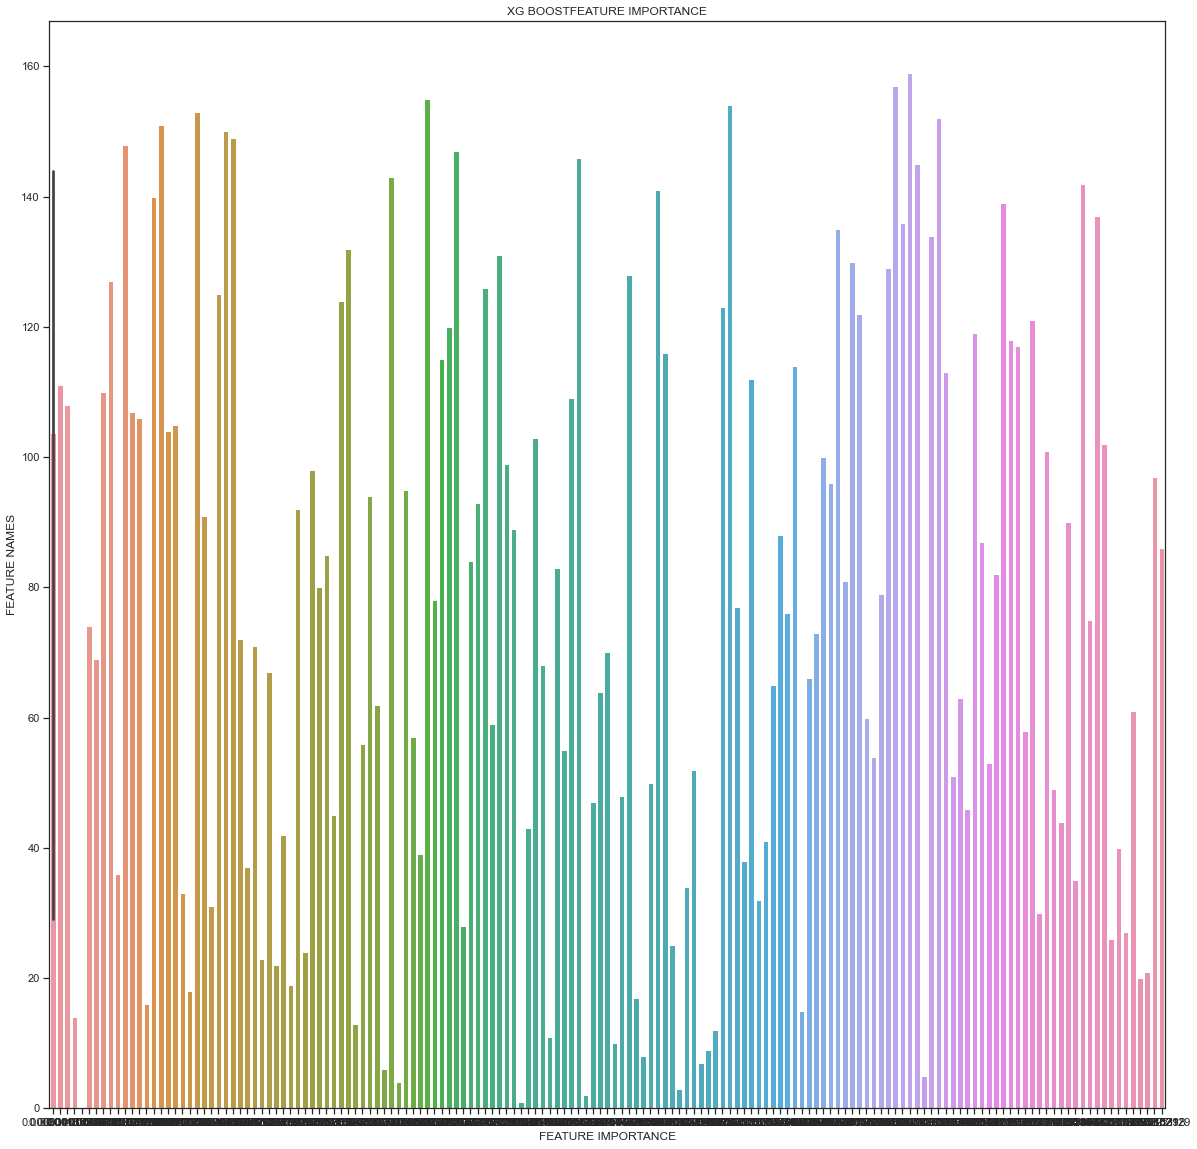

In [ ]:
# utils.hyperparameterTuning_XGBoost(x_train_bow,y_train_bow)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7)
xg_reg.fit(x_train_bow, y_train_bow)
y_pred_bow = xg_reg.predict(x_test_bow)
utils.metrics(y_test_bow,y_pred_bow)
utils.plot_feature_importance(xg_reg.feature_importances_,x_train_bow.columns,'XG BOOST')

C:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RMSE: 0.047912

R2 Score: 0.246611

MAE : 0.030960

MSE : 0.002296

RMSLE : -3.038389

max_error : 0.960899



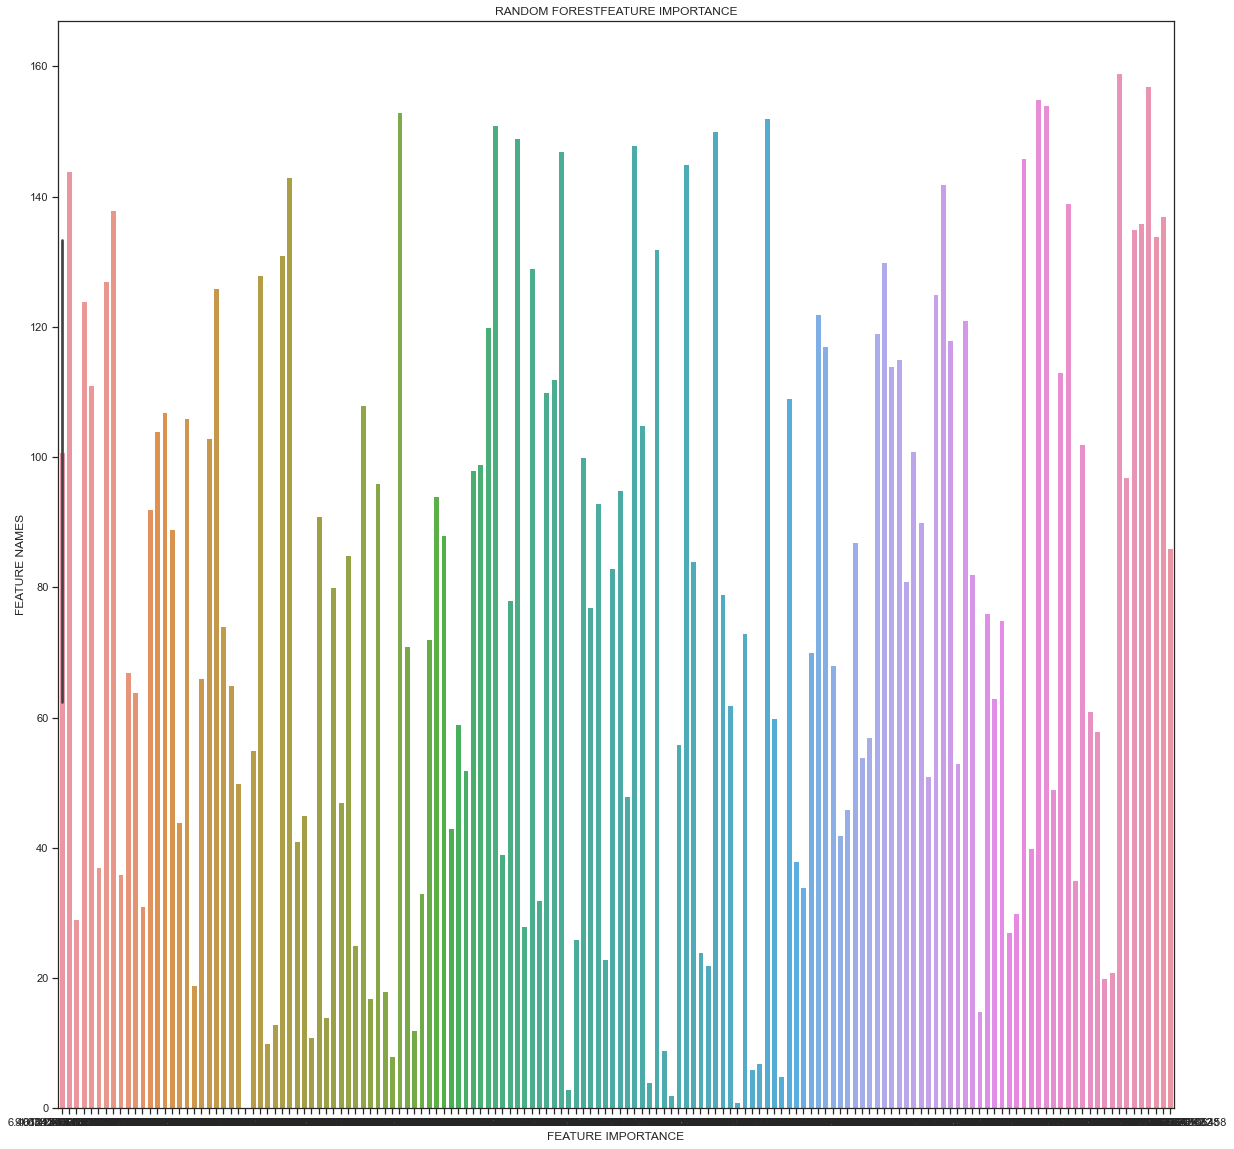

In [ ]:
# utils.hyperparameterTuning_RandomForest(x_train_bow,y_train_bow)
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train_bow, y_train_bow)
y_pred_bow = rnd_clf.predict(x_test_bow)
utils.metrics(y_test_bow,y_pred_bow)
utils.plot_feature_importance(rnd_clf.feature_importances_,x_train_bow.columns,'RANDOM FOREST')

## TF-IDF

In [ ]:
tf_idf_caption=Feature_Extraction(extracted['caption'],5,TfidfVectorizer)
tf_idf_caption
print("\n\n\n")
tf_idf_hashtags=Feature_Extraction(extracted['hashtags'],0,TfidfVectorizer)
tf_idf_hashtags
print("\n\n\n")
# tf_idf_emoji_text=Feature_Extraction(extracted['emoji_text'],0,TfidfVectorizer)
# tf_idf_emoji_text
# print("\n\n\n")
# tf_idf_mentions=Feature_Extraction(extracted['mentions'],0,TfidfVectorizer)
# tf_idf_mentions
print("\n\n\n")
tf_idf_dataset = pd.DataFrame(np.hstack((tf_idf_caption,tf_idf_hashtags,extracted)))
tf_idf_dataset
print("\n\n\n")

C:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


afternoon always amazing another around available beautiful better celeate chance cheese chocolate christmas clinic cocktail cocktails coffee coming consultation contact cosmetic course delicious delivery different eakfast everyone experience facial family favourite festive follow forward friday friends guests harley health implants important including information little london looking lovely making monday months morning natural online patient patients people perfect please procedure really result results saturday served someone something special street summer sunday support surgeon surgery thanks theres things tomorrow treatment treatments valentines website weekend welcome winter without wonderful working














In [ ]:
tf_idf_dataset

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,0,0,0,0,0.202957,0,0,0,0,0,...,0,0.63239,0.282576,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,,0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]","'stopwatch', 'page facing up', 'health worker:...",10
1,0,0,0,0,0,0,0,0,0,0,...,0,0.405556,0.168056,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,,0,"[👏, 🧡]","'clapping hands', 'orange heart'",2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,,0,[],,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0.333333,0.25,"'#michelin', '#michelinstar', '#michelinuk', '...",28,,0,[],,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0.333333,0.166667,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0,0,0,0,0,0,0,0,0,0,...,0,0.506629,0.42803,"'#lookingforward', '#theatreland', '#performin...",6,"'@evening', '@tiktok', '@nationalyouththeatre'...",4,[],,0
41737,0,0,0,0,0,0,0.253384,0,0,0,...,0,0.416667,0.491667,"'#lookingforward', '#travelinspiration', '#lov...",7,'@youmustgoblog',1,[🍾],'bottle with popping cork',1
41738,0,0,0,0,0,0,0,0,0,0,...,0,0.510417,0.260417,"'#lookingforward', '#londonviews', '#prettycit...",8,'@damienhewetson',1,[],,0
41739,0,0,0,0,0,0,0.251374,0,0,0,...,0,0.708333,0.445833,"'#lookingforward', '#travelinspo', '#datenight...",7,,0,[],,0


In [ ]:
tf_idf_dataset[87]

#23

0        possible thanks lateral flow testing fast simp...
1        grateful kind words feedback receiving since s...
2        hand dived isle jura scallop smoked roe leek c...
3        jerusalem artichoke prepared first dessert mal...
4        main course seasonal 7 course menu borders roe...
                               ...                        
41736    alongside hospitality performing arts also mas...
41737    isnt looking forward waking beautiful nights s...
41738    missing london town heres shot really showcase...
41739    closed going try keep happy inspired mix beaut...
41740    today last day traditionally take decorations ...
Name: 87, Length: 41741, dtype: object

In [ ]:
dropped = [87,110,112,114,115]
tf_idf_dataset = tf_idf_dataset.drop(dropped,axis=1)
tf_idf_dataset

df_tfidf = pd.DataFrame(tf_idf_dataset)
data_tfidf=df_tfidf.astype(str)


data_tfidf.to_csv(path + 'tfidf_dataset.csv')

In [ ]:
tfidf_data1 = preprocessing.MinMaxScaler(feature_range=(0, 1))
tfidf_normalized_df = pd.DataFrame(tfidf_data1.fit_transform(data_tfidf),  columns = data_tfidf.columns)

In [ ]:
y=tfidf_normalized_df.iloc[ :, -1:]  #Target Variable          
X=tfidf_normalized_df.iloc[: , :-1]  #Feature Matrix 

x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X, y, test_size=0.2, random_state=2022)

RMSE: 0.042115

R2 Score: 0.417893

MAE : 0.026000

MSE : 0.001774

RMSLE : -3.167353

max_error : 0.918847



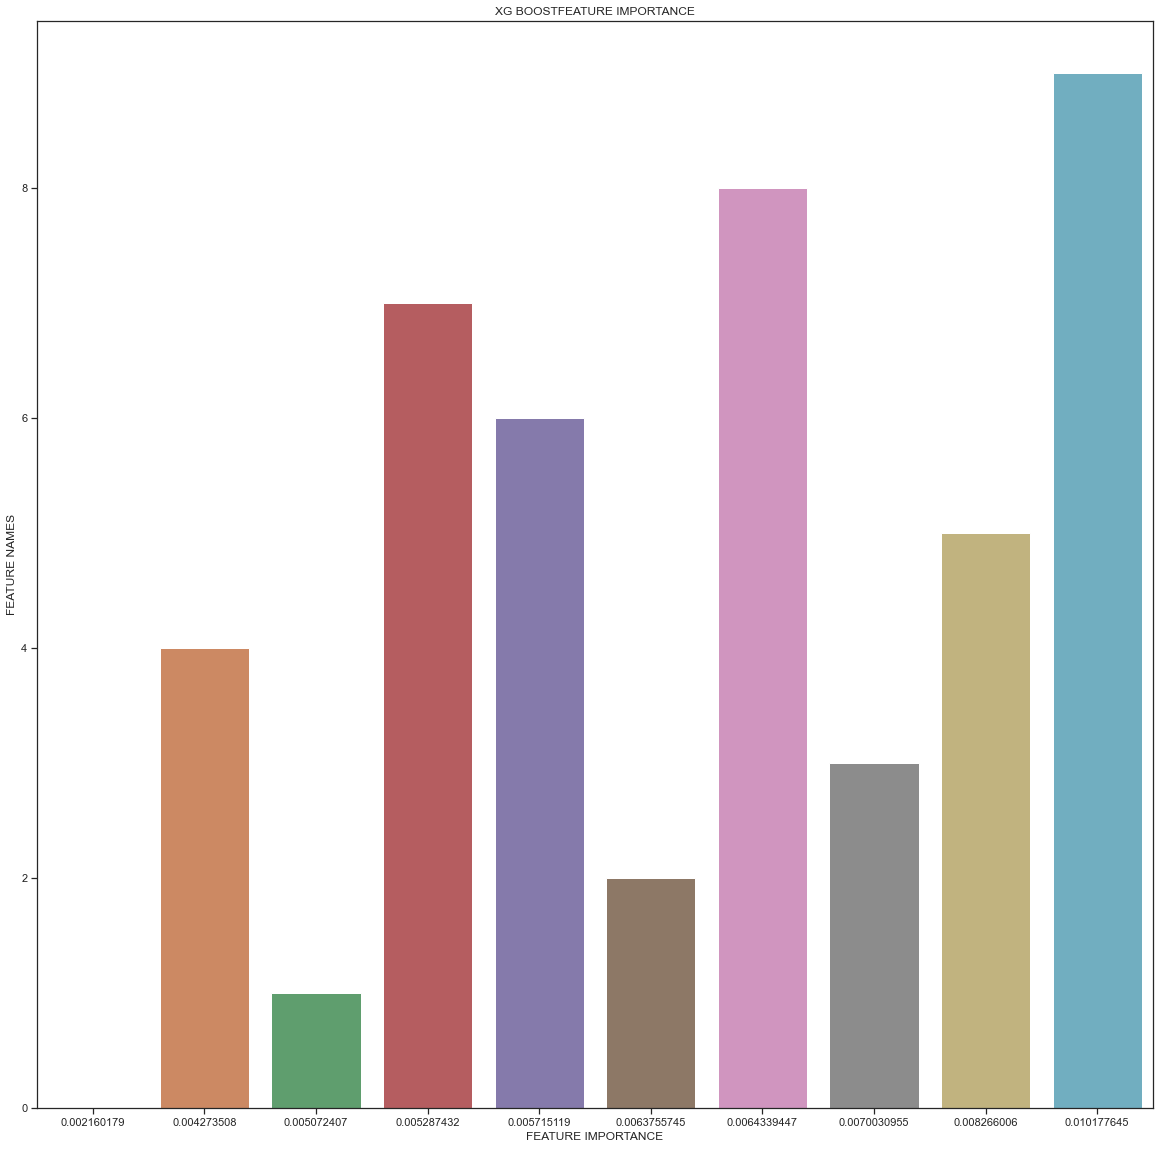

In [ ]:
# utils.hyperparameterTuning_XGBoost(x_train_bow,y_train_bow)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7)
xg_reg.fit(x_train_tfidf, y_train_tfidf)
y_pred_tfidf = xg_reg.predict(x_test_tfidf)
utils.metrics(y_test_tfidf,y_pred_tfidf)
utils.plot_feature_importance(xg_reg.feature_importances_[:10],x_train_tfidf.columns[:10],'XG BOOST')

Feature: 0, Score: 0.00216
Feature: 1, Score: 0.00507
Feature: 2, Score: 0.00638
Feature: 3, Score: 0.00700
Feature: 4, Score: 0.00427
Feature: 5, Score: 0.00827
Feature: 6, Score: 0.00572
Feature: 7, Score: 0.00529
Feature: 8, Score: 0.00643
Feature: 9, Score: 0.01018
Feature: 10, Score: 0.00725
Feature: 11, Score: 0.00721
Feature: 12, Score: 0.00578
Feature: 13, Score: 0.00595
Feature: 14, Score: 0.00331
Feature: 15, Score: 0.00675
Feature: 16, Score: 0.00282
Feature: 17, Score: 0.00466
Feature: 18, Score: 0.01799
Feature: 19, Score: 0.01677
Feature: 20, Score: 0.00650
Feature: 21, Score: 0.00818
Feature: 22, Score: 0.02540
Feature: 23, Score: 0.02186
Feature: 24, Score: 0.00445
Feature: 25, Score: 0.00306
Feature: 26, Score: 0.00327
Feature: 27, Score: 0.00720
Feature: 28, Score: 0.03302
Feature: 29, Score: 0.00285
Feature: 30, Score: 0.00522
Feature: 31, Score: 0.00449
Feature: 32, Score: 0.02060
Feature: 33, Score: 0.00478
Feature: 34, Score: 0.00693
Feature: 35, Score: 0.01128
Fe

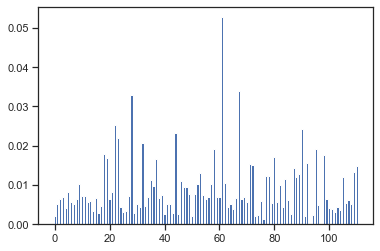

In [ ]:
from matplotlib import pyplot

importance = xg_reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:

rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train_tfidf, y_train_tfidf)
y_pred_tfidf = rnd_clf.predict(x_test_tfidf)
utils.metrics(y_test_tfidf,y_pred_tfidf)
y_pred_tfidf_=pd.DataFrame(y_pred_tfidf)

C:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RMSE: 0.047823

R2 Score: 0.249415

MAE : 0.030870

MSE : 0.002287

RMSLE : -3.040254

max_error : 0.961603

